In [1]:
# In attempting to improve linear regression models we can look to higher order regression models

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("C:\\Users\\Eddie\\Downloads\\UNZIP_FOR_NOTEBOOKS_FINAL\\08-Linear-Regression-Models\\Advertising.csv")

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
X = df.drop('sales', axis = 1)

In [6]:
y = df['sales']

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
polynomial_converter = PolynomialFeatures(degree = 2, include_bias = False, )

In [9]:
polynomial_converter.fit(X)
# don't need to train or test yet because we are not doing any machine learning models yet
# this is just a feature fit

PolynomialFeatures(include_bias=False)

In [15]:
poly_features = polynomial_converter.transform(X)
# has extra columns so that trends between two columns can be noticed
# e.g. instead of only looking at A and B
# looks at A, B, A*A, A*B, B*B

In [18]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [17]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
# shift tab to see documentation note

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train, y_train)

LinearRegression()

In [24]:
test_predictions = model.predict(X_test)

In [29]:
model.coef_
# now we want to see how the polyfeatures compare to our prior linear regression test

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [31]:
MAE = mean_absolute_error(y_test, test_predictions)

In [32]:
MSE = mean_squared_error(y_test, test_predictions)

In [33]:
RMSE = np.sqrt(MSE)

In [34]:
MAE
# Previous linear regression model MAE = 1.213

0.48967980448037934

In [35]:
RMSE
# Previous linear regression model RMSE = 1.516

0.6646431757269275

In [36]:
test_residuals = y_test - test_predictions

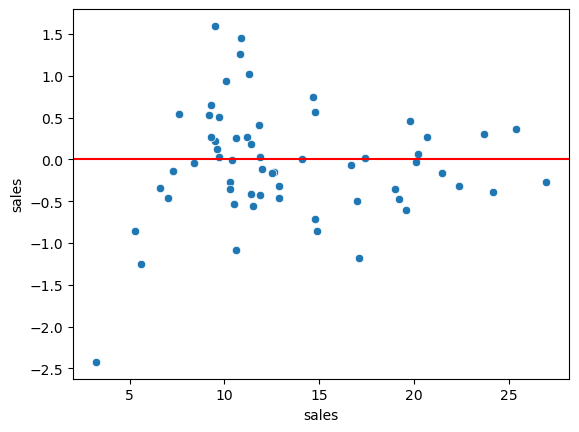

In [38]:
sns.scatterplot(x = y_test, y = test_residuals)
plt.axhline(y = 0, color = 'red')

In [39]:
import scipy as sp

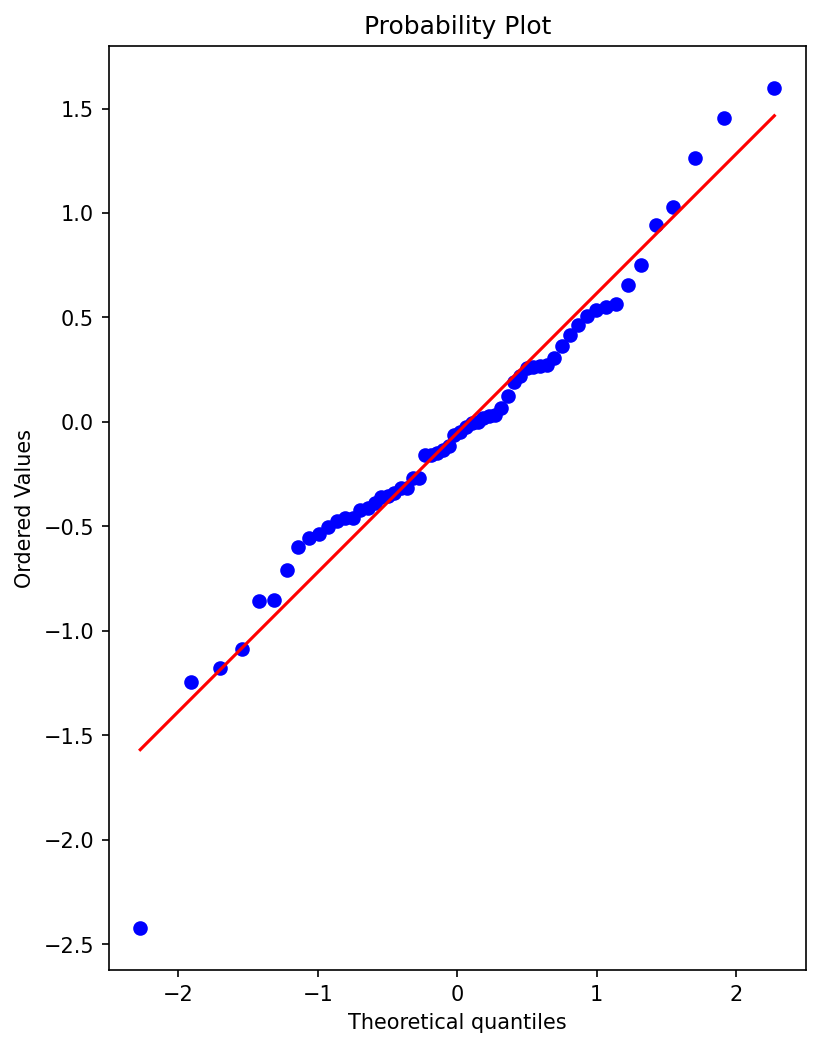

In [40]:
# create a figure and axis to plot on
fig, ax = plt.subplots(figsize = (6,8), dpi = 150)
# probplot returns the raw values if needed
# we just want to see the plot so we assign the values to _
_ = sp.stats.probplot(test_residuals, plot =ax)

# red line is a normal distribution so ideally points should be along line

In [41]:
# Choosing the degree of the polynomial regression
# We want to evaluate the training error and test error for multiple models of different polynomial degree
# To do this we will create a loop


In [42]:
# 1. create the different order polys

# 2. split poly feature train/test

# 3. fit on train

# 4. store/save the RMSE for both train & test

# 5. PLOT THE RESULTS

In [45]:
train_rmse_error = []
test_rmse_error = []

for d in range(1,10):
    poly_converter = PolynomialFeatures(degree = d, include_bias = False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_predic = model.predict(X_train)
    test_predic = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predic)) 
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predic)) 
    
    train_rmse_error.append(train_rmse)
    test_rmse_error.append(test_rmse)

In [46]:
train_rmse_error

[1.7345941243293763,
 0.5879574085292231,
 0.4339344356902066,
 0.35170836883993517,
 0.2509342951990972,
 0.19940660520798886,
 5.4214253451953605,
 0.14198684885973445,
 0.1666628383038627]

In [47]:
test_rmse_error

[1.5161519375993877,
 0.6646431757269275,
 0.5803286825156331,
 0.5077742623309994,
 2.5758247707699113,
 4.490840128985557,
 1381.3940440344732,
 4449.685935518502,
 95891.23665756262]

Text(0, 0.5, 'RMSE')

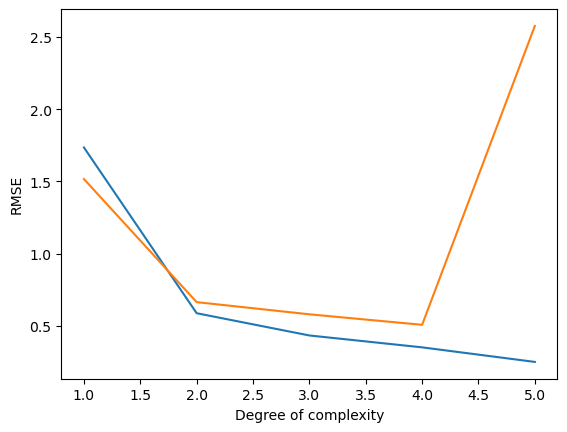

In [53]:
plt.plot(range(1,6), train_rmse_error[:5], label = "TRAIN_RMSE")
plt.plot(range(1,6),test_rmse_error[:5], label= 'TEST_RMSE')

plt.xlabel('Degree of complexity')
plt.ylabel('RMSE')

# Now that we have plot we can see that after the 4th degree the test RMSE explodes
# So do we pick 4th degree because it's the lowest??
# Essentially for safety reason we should pick either 3rd or 2nd degree
# the risk/reward ratio for a 4th degree polynomial is not worth it 

In [54]:
# MODEL DEPLOYMENT

In [55]:
final_poly_converter = PolynomialFeatures(degree = 3, include_bias=False)

In [56]:
final_model = LinearRegression()

In [58]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X, y)

# NOW WE HAVE OUR FINAL MODEL TRAINED ON ENTIRE DATASET

LinearRegression()

In [59]:
from joblib import dump,load


In [60]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [61]:
dump(final_poly_converter, 'final_converter.joblib')

# ^^ SAVING MODEL AND CONVERTER

['final_converter.joblib']

In [62]:
loaded_converter = load('final_converter.joblib')

In [63]:
loaded_model = load('final_poly_model.joblib')

# ^^ LOADING MODEL AND CONVERTER

In [64]:
campaign = [[149,22,12]]

In [67]:
transformed_data = loaded_converter.fit_transform(campaign)

# CAMPAIGN IS NOW CONVERTED TO A FORMAT THE MODEL CAN USE 
# I.E. ONE WITH ALL TERMS UP TO 3RD ORDER

In [68]:
loaded_model.predict(transformed_data)

array([14.64501014])